In [13]:
# The main goal that we would like to achieve from this data is to accurately predict 
# and forecast the sales of items sold by Favorita supermarkets. 
# The following is what we will be doing 
#     1) Data inspeciton - check data quality/fix missing inputs etc.
#     2) Visualize data 
#     3) Training data exploration 
#     4) predict with learning models

# Importing the relevant libraries
import IPython.display   #Public API for display tools in IPython.
import json  #JSON is a syntax for storing and exchanging data. JSON is text, written with JavaScript object notation.
import pandas as pd # for statistical analysis/ reading files etc.
import seaborn as sns # statistical graphing
import squarify  # treemap layout, returns json, required coordinates.
%matplotlib inline # make your plot outputs appear and be stored within the notebook.
import missingno as msno #Missing data visualization module for Python.
import plotly.offline as py   #plotting offline graphs.
py.init_notebook_mode(connected=True) #this is so that graphs appear in our jupyter notebook
import plotly.graph_objs as go 
import plotly.tools as tls
import numpy as np  #arithmetic
from matplotlib import pyplot as plt 

dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}


In [14]:
# loading in the data
items = pd.read_csv("items.csv")
holiday_events = pd.read_csv("holidays_events.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
transactions = pd.read_csv("transactions.csv",parse_dates=['date'])
# Read in the full training data just to get prior information and here is the output:
# Output: "125,497,040 rows | 6 columns"
train = pd.read_csv('train.csv', index_col='id', parse_dates=['date'], dtype=dtypes)
date_mask = (train['date'] >= '2017-01-01') & (train['date'] <= '2017-01-31')
print(train.shape)
train = train[date_mask]
print(train.shape)


/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(125497040, 5)
(3134770, 5)


In [15]:
# Lets check for null values in our data 

print(oil.columns.values, oil.isnull().any().values)
print(holiday_events.columns.values, holiday_events.isnull().any().values)
print(stores.columns.values, stores.isnull().any().values)
print(transactions.columns.values, transactions.isnull().any().values)
print(train.columns.values, train.isnull().any().values)
print(items.columns.values, items.isnull().any().values)

# we can see that there are only null values in our oil.csv data 



['date' 'dcoilwtico'] [False  True]
['date' 'type' 'locale' 'locale_name' 'description' 'transferred'] [False False False False False False]
['store_nbr' 'city' 'state' 'type' 'cluster'] [False False False False False]
['date' 'store_nbr' 'transactions'] [False False False]
['date' 'store_nbr' 'item_nbr' 'unit_sales' 'onpromotion'] [False False False False False]
['item_nbr' 'family' 'class' 'perishable'] [False False False False]


In [16]:
# Lets take a look at our oil data 
oil.head(10)
# we can see the NaN value that appears in the first row, and these are the values that we need to fix.


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [106]:
# Visualizing oil data with plotly library. (scatter plot)

trace = go.Scatter(
    name='Oil prices',
    x=oil['date'],
    y=oil['dcoilwtico'].dropna(),  #this will drop the NaN values with the help of drop.na() function
    #mode='markers', #can also use line
    mode='lines',
    line=dict(color='rgb(20, 15, 200, 0.8)'),
  #  fillcolor='rgba(68, 68, 68, 0.3)', #gray color fill
    fillcolor='rgba(0, 0, 216, 0.3)',   #light blue color fill
    fill='tonexty' )

data = [trace]

layout = go.Layout(
    yaxis=dict(title='Daily Oil price'),
    title='Daily oil prices from Jan 2013 till July 2017',
    showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-time-series-error-bars')



In [19]:
# visualizing store data lets look at our data first 
stores.head(10)
#Here we would like to use a treemap plot with our squarify library, 
# this shows our plot as squares like a map. 

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


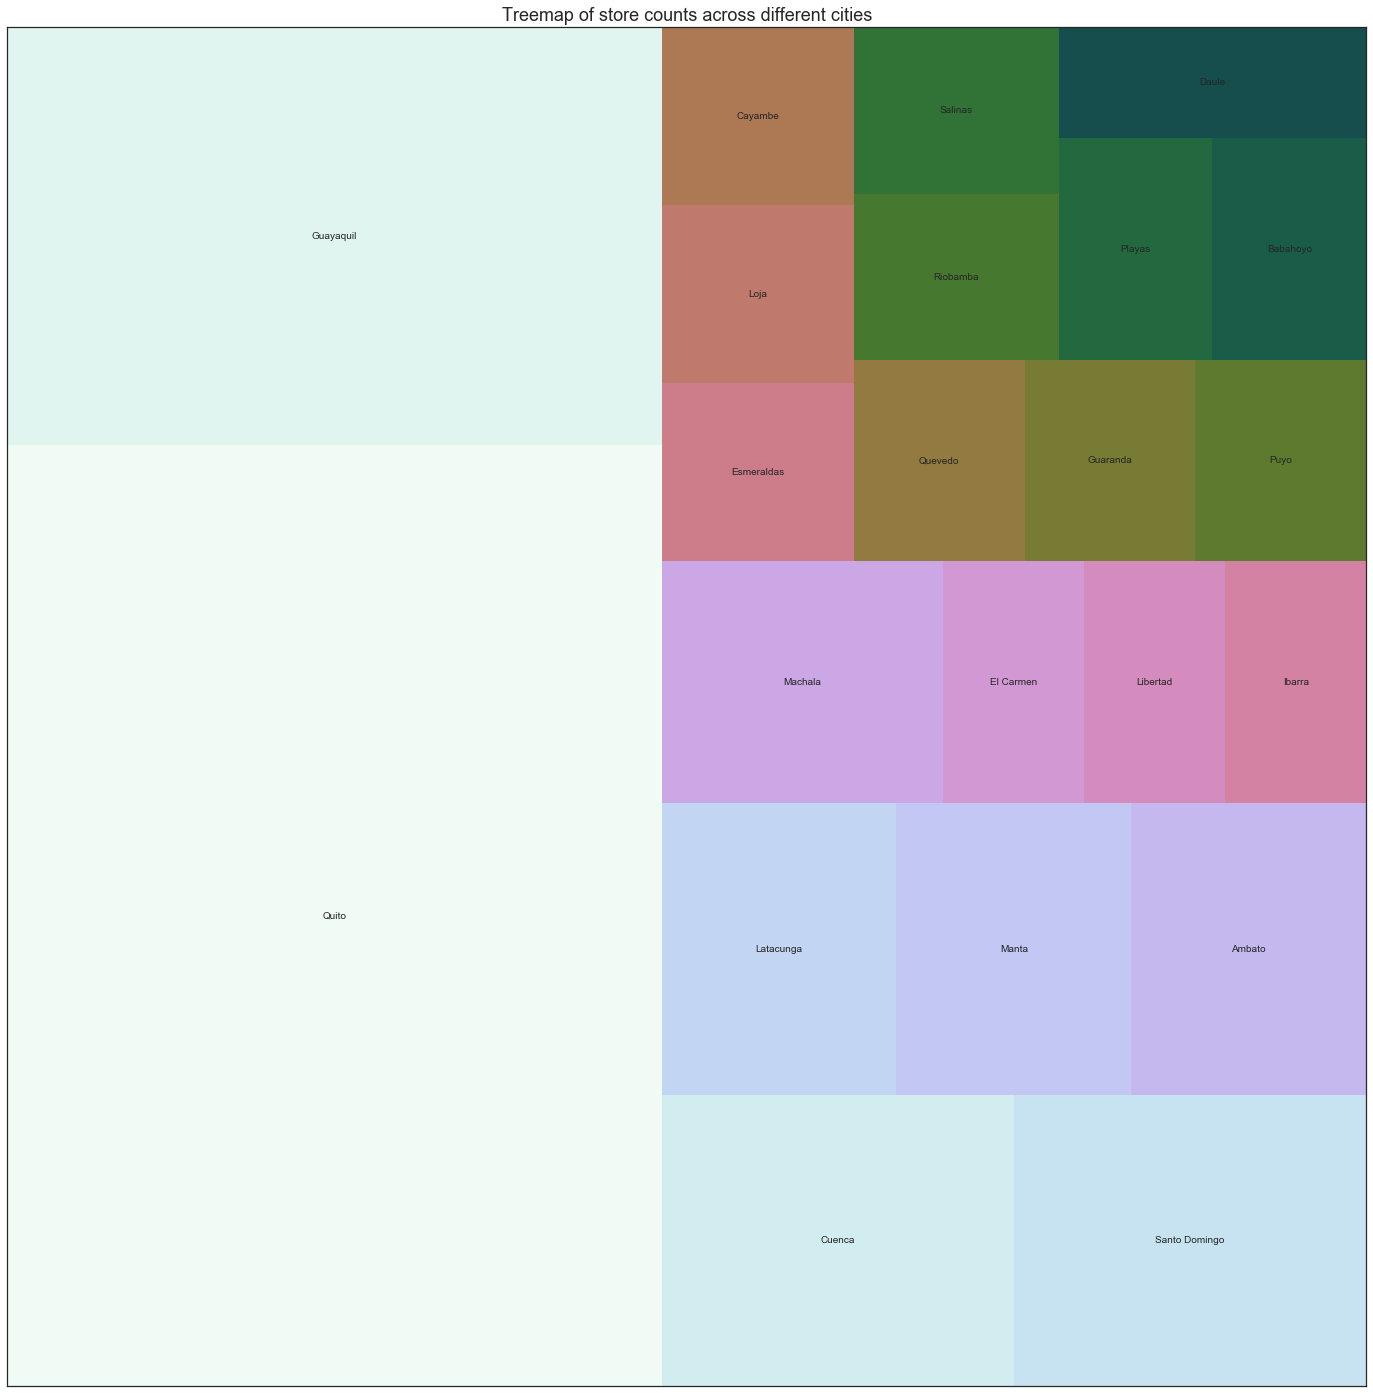

In [125]:
#lets plot the store count of different cities.

fig = plt.figure(figsize = (20,15))
marrimekko = stores.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = 'equal')
ax = squarify.plot(sizes = marrimekko['city'].values, label=marrimekko.index,
                  color = sns.color_palette('cubehelix_r', 28), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different cities", fontsize=18)
plt.show();


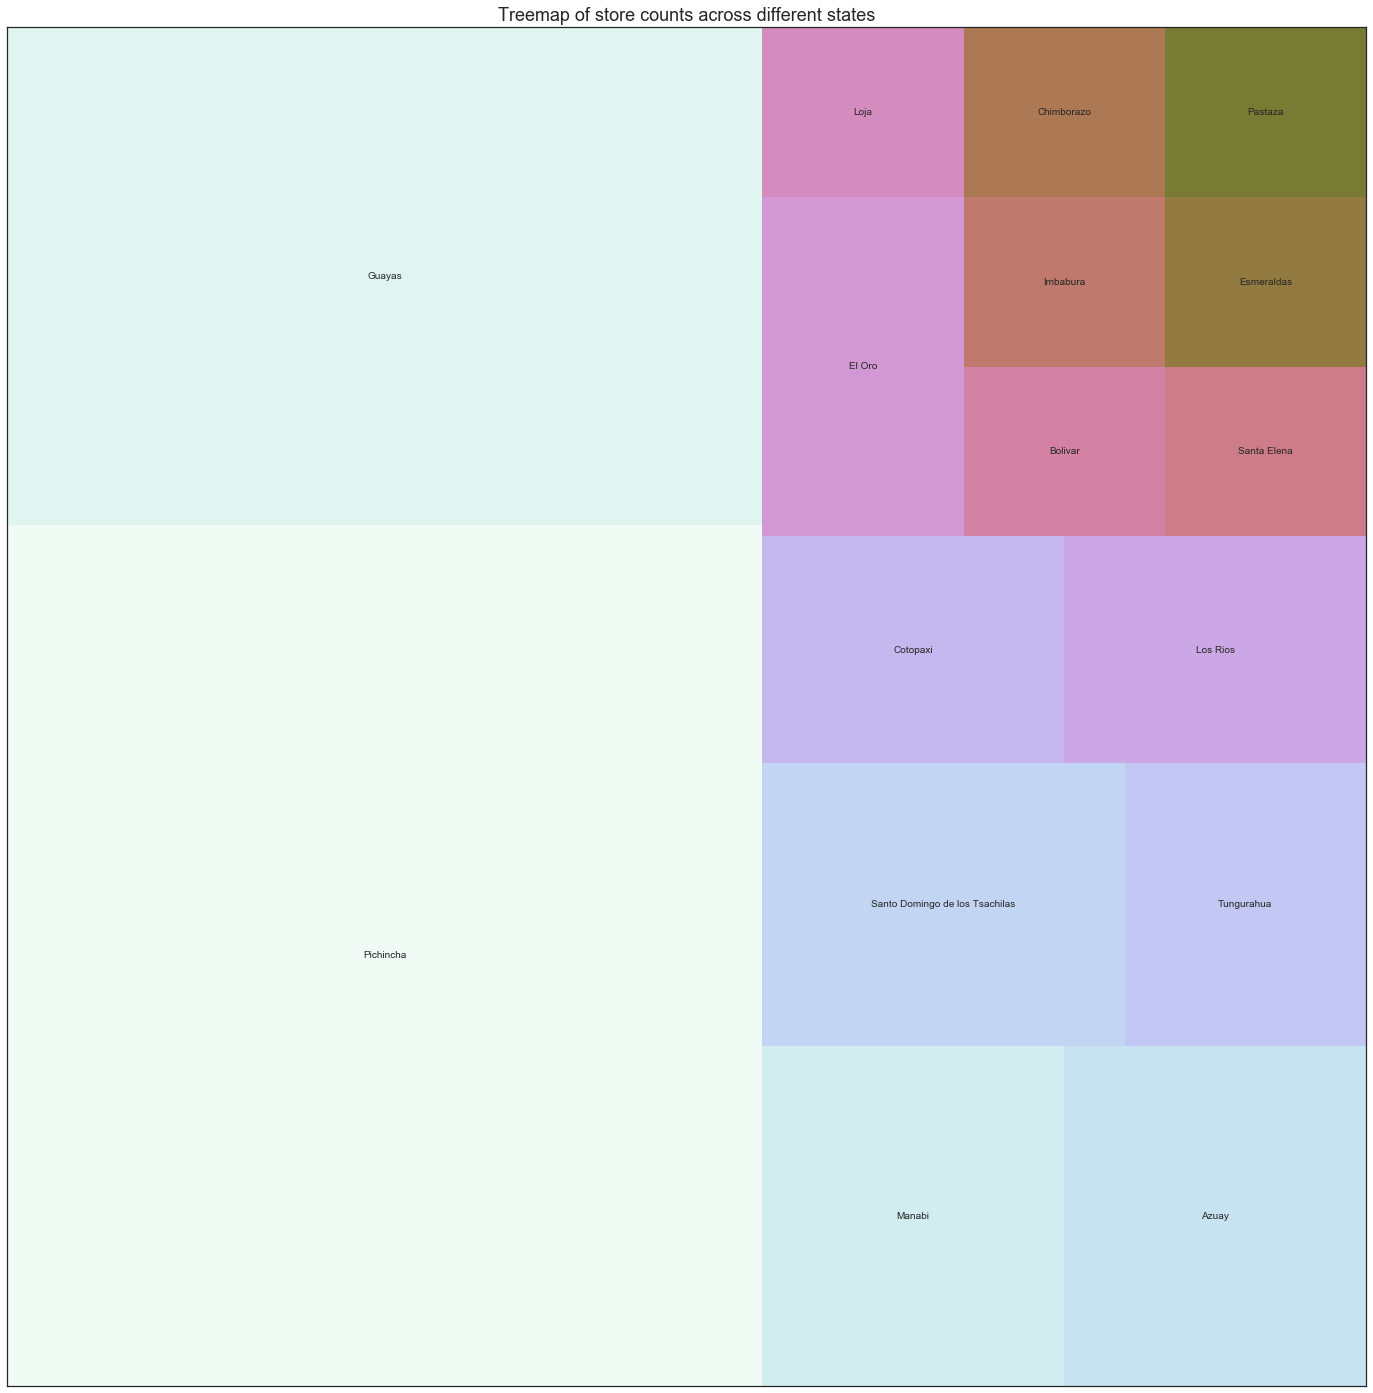

In [124]:
# lets do the same for each state

fig = plt.figure(figsize = (20,15))
marrimekko = stores.state.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = 'equal')
ax = squarify.plot(sizes = marrimekko['state'].values, label=marrimekko.index,
                  color = sns.color_palette('cubehelix_r', 28), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different states", fontsize=18)
plt.show();

Text(0.5, 1.0, 'Store numbers and the clusters they are assigned to')

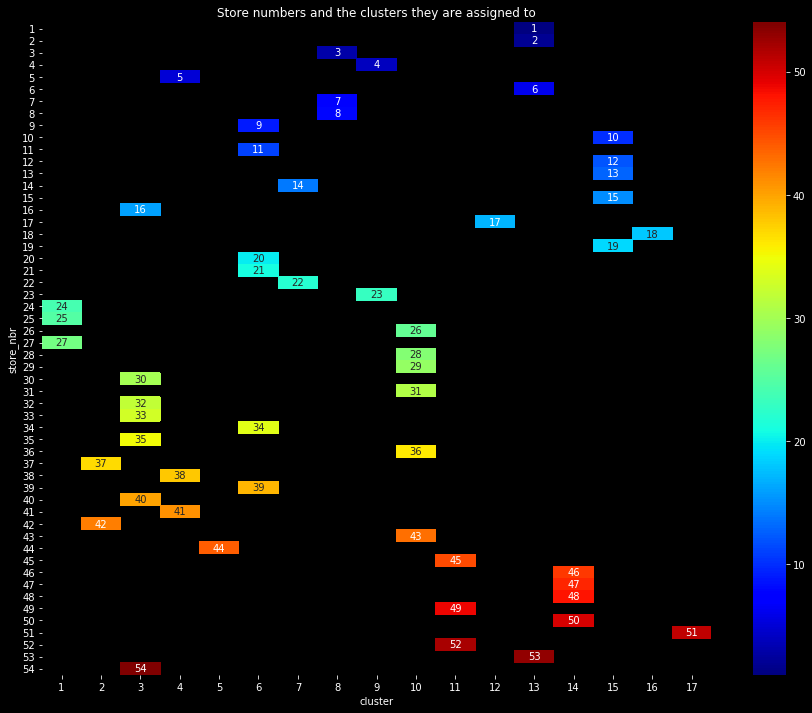

In [37]:
# seaborn heatmap of store numbers and its coreesponding clustor

plt.style.use('dark_background')  
plt.figure(figsize=(15,12))
store_pivot = stores.dropna().pivot("store_nbr","cluster", "store_nbr") 

#DataFrame.pivot(index=None, columns=None, values=None)

ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to')

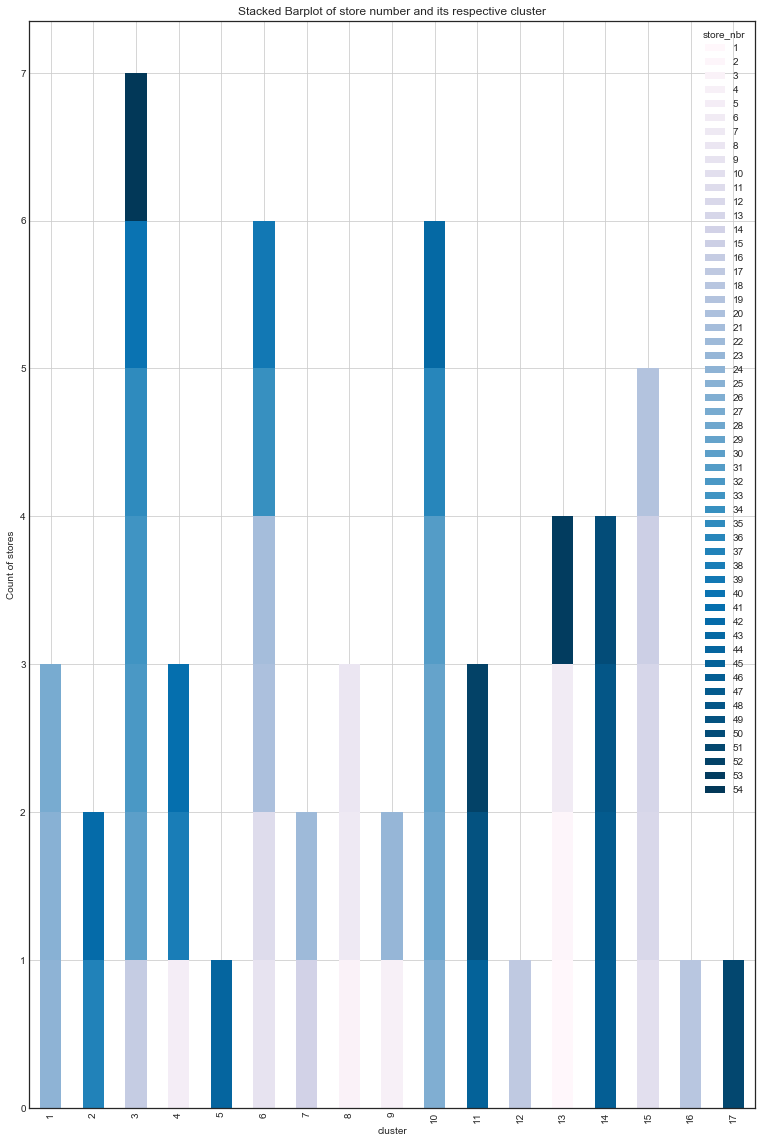

In [126]:
#this is the same as above, but using a stacked boxplot.

plt.style.use('seaborn-white')
city_cluster = stores.groupby(['cluster','store_nbr']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,20),  grid=True)
plt.title('Stacked Barplot of store number and its respective cluster')
plt.ylabel('Count of stores')
plt.show()

In [77]:
# Bar graph of number of clustuers

array = stores.cluster.values
unique, counts = np.unique(array, return_counts = True)

data = [go.Bar(
    x=unique,
    y=counts,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
        color='rgb(8,48,107)',
        width=1.5,
        )
    ),
    opacity = 0.6,
    name = 'No.of stores'
)]

layout = go.Layout(
    xaxis=dict(title='cluster number'),
    yaxis=dict(title='No. of stores'),
    title='count of stores in each cluster',
    showlegend = True)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='number-of-stores-in-cluster-bar-graph')

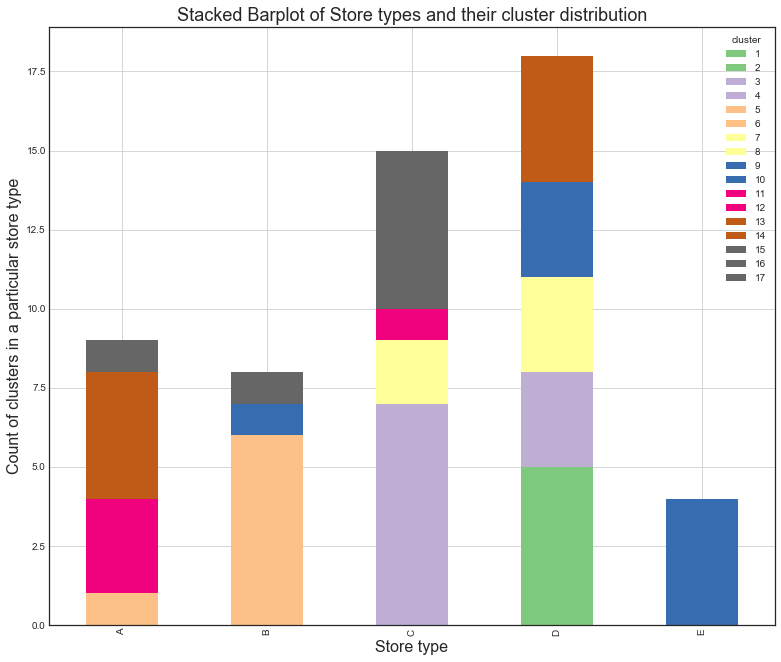

In [108]:
# now we can take a look at the distribution of clusters based on the store type 
# to see if we can identify any apparent relationship between types and the way 
# the company has decided to cluster the particular store.

plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'Accent', figsize=(13,11),  grid=True)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

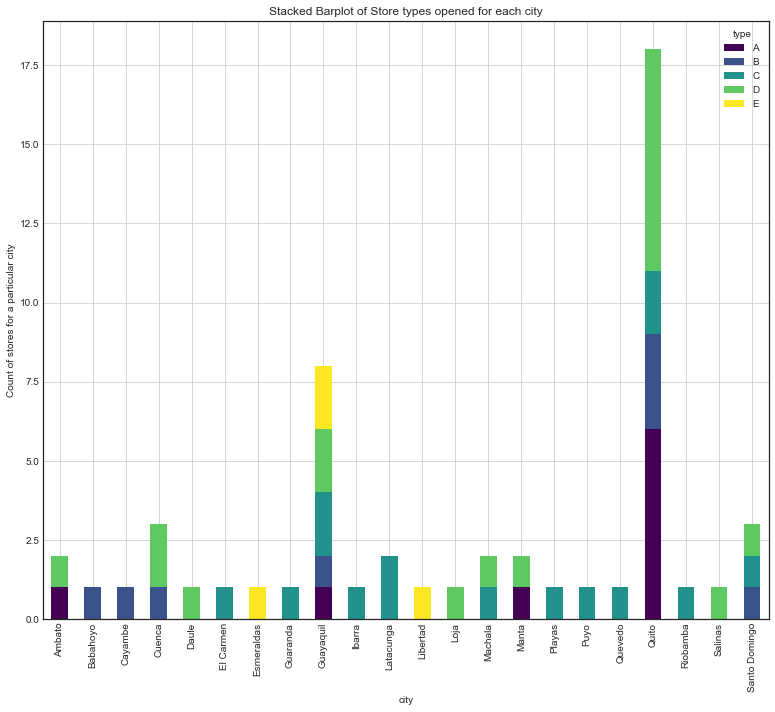

In [116]:
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=True)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

# This plot is expected since Quinto is the capital of Ecuador and Guayaquil is the largest and most 
# populated city in Ecuador.

In [117]:
# Now we take a look at our data for holiday event
holiday_events.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


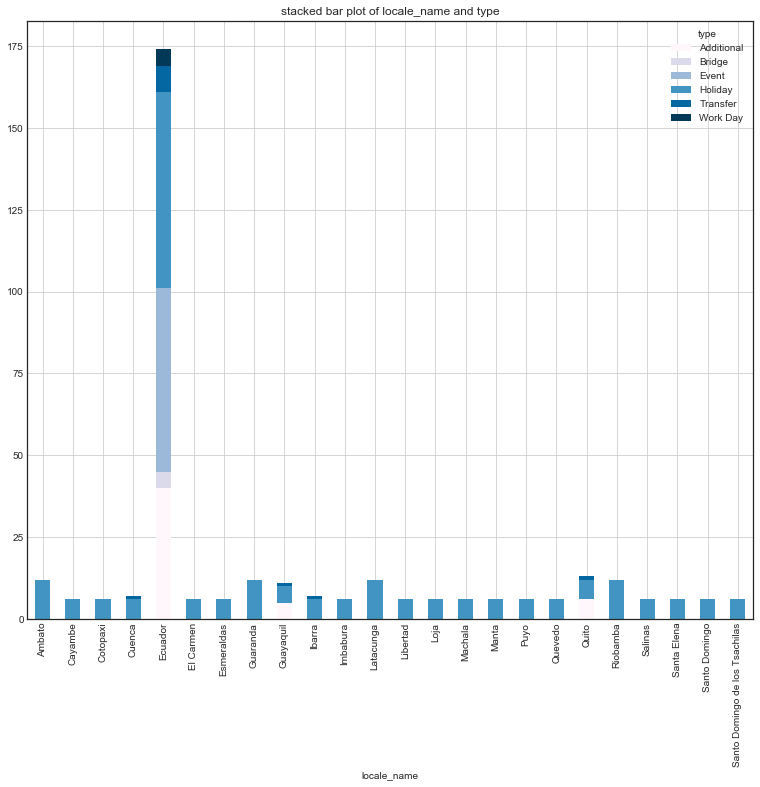

In [121]:
#stacked bar plot of locale_name and type
plt.style.use('seaborn-white')
type_cluster = holiday_events.groupby(['locale_name','type']).size()
type_cluster.unstack().plot(kind='bar',stacked=True,colormap='PuBu',figsize=(13,11),grid=True)
plt.title('stacked bar plot of locale_name and type')
plt.show()

In [127]:
#Now lets take a look at transaction data 
transactions.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [ ]:
plt.style.use('seaborn-white')
plt.figure(figsize=(13,11))
plt.plot(transactions.date.values, transactions.transactions.values, color='darkblue')
plt.ylim(-50, 10000)
plt.title("Distribution of transactions per day from 2013 till 2017")
plt.ylabel('transactions per day', fontsize= 16)
plt.xlabel('Date', fontsize= 16)
plt.show()

# We can see that transactions are exptremely high during the end of each year
# we can explain that with some type of christmas or New Years holiday event causing a
# rise in transactions.

In [131]:
# Lets look at item data
items.head(10)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [133]:
x, y = (list(x) for x in zip(*sorted(zip(items.family.value_counts().index, 
                                         items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y=items.family.value_counts().values,
    x=items.family.value_counts().index,
    marker=dict(
        color=items.family.value_counts().values,
        colorscale = 'Portland',
        reversescale = False
    ),
    orientation='v',
)

layout = dict(
    title='Counts of items per family category',
     width = 800, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [134]:
x, y = (list(x) for x in zip(*sorted(zip(items['class'].value_counts().index, 
                                         items['class'].value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    x=items['class'].value_counts().index,
    y=items['class'].value_counts().values,
    marker=dict(
        color=items['class'].value_counts().values,
        colorscale = 'Jet',
        reversescale = True
    ),
    orientation='v',
)

layout = dict(
    title='Number of items attributed to a particular item class',
     width = 800, height = 1400,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [135]:
# Finally lets look at train data
train.head(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
101688779,2017-01-01,25,99197,1.0,False
101688780,2017-01-01,25,103665,7.0,False
101688781,2017-01-01,25,105574,1.0,False
101688782,2017-01-01,25,105857,4.0,False
101688783,2017-01-01,25,106716,2.0,False
101688784,2017-01-01,25,108698,2.0,False
101688785,2017-01-01,25,108786,1.0,False
101688786,2017-01-01,25,108797,1.0,False
101688787,2017-01-01,25,108862,1.0,False


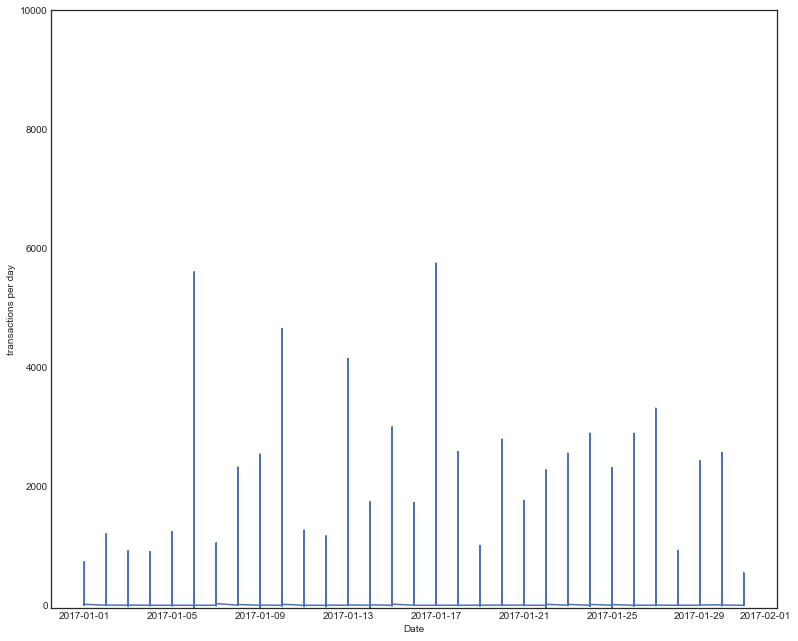

In [136]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(13,11))
plt.plot(train.date.values, train.unit_sales)
plt.ylim(-50, 10000)
plt.ylabel('transactions per day')
plt.xlabel('Date')
plt.show()